In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("Customer-Churn-Prediction.csv")

In [3]:
df.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3476,3756-VNWDH,Male,1,Yes,No,65,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,One year,Yes,Electronic check,100.75,6674.65,No
3953,4505-EXZHB,Female,1,No,No,6,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,No,Electronic check,74.40,434.1,Yes
4017,9473-CBZOP,Female,0,No,No,28,Yes,Yes,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,59.00,1654.45,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162289,32.370865,64.761692
std,0.368742,24.559231,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.shape

(7043, 21)

# Remove duplicates

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(7043, 21)

In [9]:
df.isnull().values.any()

False

In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
len(df.columns)

21

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

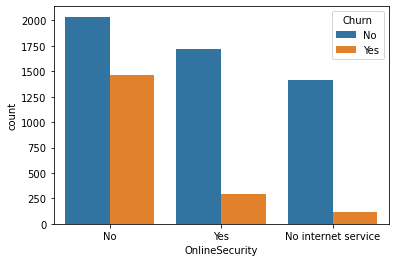

In [13]:
sns.countplot(x = "OnlineSecurity" , hue = "Churn",data = df)


<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

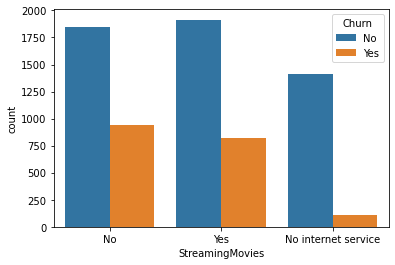

In [14]:
sns.countplot(x = "StreamingMovies",hue = "Churn",data =df)

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

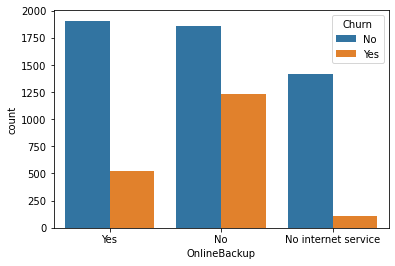

In [15]:
sns.countplot(x = "OnlineBackup",hue = "Churn",data =df)

# Encoding the data set

In [16]:
from sklearn.preprocessing import LabelEncoder
from pandas.core.dtypes.common import is_numeric_dtype


for c in df.columns:
    if is_numeric_dtype(df[c]):
        continue
    else:
        df[c] = LabelEncoder().fit_transform(df[c])

In [17]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int32  
 1   gender            7043 non-null   int32  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   int32  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int32  
 7   MultipleLines     7043 non-null   int32  
 8   InternetService   7043 non-null   int32  
 9   OnlineSecurity    7043 non-null   int32  
 10  OnlineBackup      7043 non-null   int32  
 11  DeviceProtection  7043 non-null   int32  
 12  TechSupport       7043 non-null   int32  
 13  StreamingTV       7043 non-null   int32  
 14  StreamingMovies   7043 non-null   int32  
 15  Contract          7043 non-null   int32  
 16  PaperlessBilling  7043 non-null   int32  


# Separating x and y

In [19]:
x = df.drop("Churn",axis = 1)
y = df.Churn

In [20]:
x

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,5375,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,3962,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,2564,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,5535,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597
7039,1525,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698
7040,3367,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994
7041,5934,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660


In [21]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

In [22]:
x.shape

(7043, 20)

In [23]:
y.shape

(7043,)

In [24]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [25]:
df.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [26]:
not_churned = (5174/(5174+1869)) * 100
churned = (1869/(5174+1869)) * 100

In [27]:
print(f"Not churned {not_churned} percent of total people")
print(f"Churned {churned} percent of total people")

Not churned 73.4630129206304 percent of total people
Churned 26.536987079369588 percent of total people


# Imbalanced Data Handling  And applying KNN_classifier 

# OverSampling

In [28]:
from imblearn.over_sampling import RandomOverSampler
ROS = RandomOverSampler(random_state =100)

In [29]:
x_new,y_new=ROS.fit_resample(x,y)

In [30]:
x_new.shape

(10348, 20)

In [31]:
y_new.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

In [32]:
y_new.shape

(10348,)

In [33]:
x_new.value_counts()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges
2678        1       0              1        1           1       1             0              1                0               0             0                 0            2            2                0         0                 3              89.15           6297            10
1461        1       0              1        0           13      1             2              0                0               0             2                 0            2            2                1         1                 3              75.30           6508             9
3944        1       0              0        0           1       1             0              0                0               0             0                 0          

In [34]:
#x_new.drop_duplicates(inplace=True)

In [35]:
#x_new.shape

# Near_Miss for under sampling

In [36]:
from imblearn.under_sampling import NearMiss
NM = NearMiss()

In [37]:
new_x,new_y=NM.fit_resample(x,y)

In [38]:
new_x

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,3938,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,69.90,5454
1,5549,0,0,1,0,1,1,0,2,1,1,1,1,1,1,0,1,0,20.30,1612
2,5706,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,3,71.10,5565
3,4245,0,0,0,0,32,1,2,0,2,0,0,0,2,2,1,0,3,74.75,1923
4,4742,0,0,1,1,43,0,1,0,2,2,0,2,2,0,1,1,0,51.25,1769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3733,1155,1,0,0,0,12,1,0,0,0,0,0,2,2,0,1,1,2,59.80,5651
3734,6201,0,0,0,0,9,1,0,0,0,0,0,0,0,0,0,1,0,44.20,3448
3735,4893,1,1,0,0,1,1,2,1,0,0,0,0,0,0,0,1,2,75.75,5776
3736,437,0,0,0,0,67,1,2,1,2,2,2,0,2,0,0,1,1,102.95,5431


In [39]:
new_x.shape

(3738, 20)

In [40]:
new_y.shape

(3738,)

In [41]:
new_y.value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

In [42]:
df.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

# Synthetic Minority Oversampling Technique (SMOTETomek)

In [43]:
from imblearn.combine import SMOTETomek
SM = SMOTETomek(random_state = 42)

In [44]:
combine_x , combine_y = SM.fit_resample(x,y)
combine_x.shape

(9474, 20)

In [45]:
combine_x.shape

(9474, 20)

In [46]:
combine_y.shape

(9474,)

In [47]:
combine_y.value_counts()

0    4737
1    4737
Name: Churn, dtype: int64

In [48]:
combine_x.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,5375,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,3962,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,2564,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,5535,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925


# HoldOut cross validation with KNN classifier

In [49]:
from sklearn.model_selection import train_test_split 

from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier()

In [50]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.30 ,random_state =1)
KNC.fit(xtrain,ytrain)

Normal_dataset_accuracy = KNC.score(xtest,ytest)

Normal_dataset_accuracy

0.7075248461902508

# For over sampling

In [51]:
#x_new & y_new for over samplig 

over_xtrain,over_xtest,over_ytrain,over_ytest = train_test_split(x_new,y_new,test_size = 0.30 ,random_state =42)
KNC.fit(x_new,y_new)

OverSampleing_dataset_accuracy = KNC.score(over_xtest,over_ytest)

OverSampleing_dataset_accuracy

0.7913043478260869

# For nearmiss under sampligng

In [52]:
nmxtrain,nmxtest,nmytrain,nmytest=train_test_split(new_x,new_y,test_size = 0.30 ,random_state =42)
KNC.fit(new_x,new_y)

KNeighborsClassifier()

In [53]:
NearMiss_Sampleing_dataset_accuracy = KNC.score(nmxtest,nmytest)
NearMiss_Sampleing_dataset_accuracy

0.6301247771836007

# for synthetic minority oversampling technuques

In [54]:
combine_xtrain,combine_xtest,combine_ytrain,combine_ytest = train_test_split(combine_x,combine_y,test_size = 0.30 ,random_state =1)
KNC.fit(combine_xtrain,combine_ytrain)

CombineSampleing_dataset_accuracy = KNC.score(combine_xtest,combine_ytest)

CombineSampleing_dataset_accuracy

0.6915230390432642

# K fold cross validation

In [55]:
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits = 5)

NormalDataset_kfold_result = cross_val_score(KNC,x,y,cv = kfold)

NormalDataset_kfold_result

array([0.69907736, 0.68772179, 0.6848829 , 0.671875  , 0.67613636])

In [56]:
NormalDataset_kfold_result.max()

0.6990773598296665

In [57]:
NormalDataset_kfold_result.min()

0.671875

In [58]:
NormalDataset_kfold_result.mean()

0.6839386815278405

In [59]:
NormalDataset_kfold_acurracy = NormalDataset_kfold_result.mean()
NormalDataset_kfold_acurracy 

0.6839386815278405

# for over sampling

In [60]:
OverSampleingDataset_kfold_result = cross_val_score(KNC,x_new,y_new,cv = kfold)

OverSampleingDataset_kfold_result

array([0.5589372 , 0.552657  , 0.57536232, 0.68777187, 0.62300628])

In [61]:
OverSampleingDataset_kfold_accuracy = OverSampleingDataset_kfold_result.mean()

OverSampleingDataset_kfold_accuracy

0.5995469350873137

# for under sampling 

In [62]:
UnderSampleingDataset_kfold_result = cross_val_score(KNC,new_x,new_y,cv = kfold)

UnderSampleingDataset_kfold_result

array([0.09491979, 0.22994652, 0.40775401, 0.18607764, 0.16733601])

In [63]:
UnderSampleingDataset_kfold_result_accuracy=UnderSampleingDataset_kfold_result.mean()
UnderSampleingDataset_kfold_result_accuracy

0.21720679509481777

# for synthetic minority over sampling techniques

In [64]:
CombineSampleingDataset_kfold_result = cross_val_score(KNC,combine_x,combine_y,cv = kfold)

CombineSampleingDataset_kfold_result

array([0.62058047, 0.60369393, 0.61477573, 0.76728232, 0.72280887])

In [65]:
CombineSampleingDataset_kfold_result_accuracy=CombineSampleingDataset_kfold_result.mean()
CombineSampleingDataset_kfold_result_accuracy

0.6658282647884027

# stratified k fold cross validation

In [66]:
from sklearn.model_selection import StratifiedKFold

Stf_Kfold = StratifiedKFold(n_splits = 5)

NormalDataset_Sf_Kfold_result = cross_val_score(KNC,x,y,cv = Stf_Kfold)

NormalDataset_Sf_Kfold_result

array([0.69836764, 0.68417317, 0.68417317, 0.67258523, 0.67897727])

In [67]:
NormalDataset_Sf_Kfold_result_accuracy=NormalDataset_Sf_Kfold_result.mean()
NormalDataset_Sf_Kfold_result_accuracy

0.6836552963094393

# for over sampling

In [68]:
OverSampleingDataset_Sf_kfold_result = cross_val_score(KNC,x_new,y_new,cv = Stf_Kfold)

OverSampleingDataset_Sf_kfold_result

array([0.63236715, 0.64154589, 0.67826087, 0.67472209, 0.6901885 ])

In [69]:
OverSampleingDataset_Sf_kfold_result_accuracy=OverSampleingDataset_Sf_kfold_result.mean()
OverSampleingDataset_Sf_kfold_result_accuracy

0.6634168995734129

# for under sampling

In [70]:
UnderSampleingDataset_SF_kfold_result = cross_val_score(KNC,new_x,new_y,cv = Stf_Kfold)

UnderSampleingDataset_SF_kfold_result


array([0.34893048, 0.42647059, 0.44117647, 0.42971888, 0.46184739])

In [71]:
UnderSampleingDataset_SF_kfold_accuracy = UnderSampleingDataset_SF_kfold_result.mean()

UnderSampleingDataset_SF_kfold_accuracy

0.4216287610334386

# for synthetic minority over sampling techniques

In [72]:
CombineSampleingDataset_Sf_kfold_result = cross_val_score(KNC,combine_x,combine_y,cv = Stf_Kfold)

CombineSampleingDataset_Sf_kfold_result

array([0.69709763, 0.68548813, 0.72664908, 0.73192612, 0.72650475])

In [73]:
CombineSampleingDataset_Sf_kfold_accuracy = CombineSampleingDataset_Sf_kfold_result.mean()

CombineSampleingDataset_Sf_kfold_accuracy

0.713533140343203

# Leave one out cross validation

In [74]:
from sklearn.model_selection import LeaveOneOut
le = LeaveOneOut()

In [75]:
NormalDataset_LeaveOneOut_result = cross_val_score(KNC,x,y,cv = le)

NormalDataset_LeaveOneOut_result

array([1., 1., 0., ..., 1., 0., 1.])

In [76]:
NormalDataset_LeaveOneOut_accuracy = NormalDataset_LeaveOneOut_result.mean()
NormalDataset_LeaveOneOut_accuracy

0.6863552463438876

# for over sampling

In [77]:
OverSampleingDataset_LeaveOneOut_result = cross_val_score(KNC,x_new,y_new,cv = le)

OverSampleingDataset_LeaveOneOut_result

array([1., 0., 0., ..., 1., 1., 1.])

In [78]:
OverSampleingDataset_LeaveOneOut_accracy = OverSampleingDataset_LeaveOneOut_result.mean() 

OverSampleingDataset_LeaveOneOut_accracy

0.6799381522999614

# for under sampling

In [79]:
UnderSampleingDataset_LeaveOneOut_result = cross_val_score(KNC,new_x,new_y,cv = le)

UnderSampleingDataset_LeaveOneOut_result

array([0., 0., 0., ..., 1., 1., 0.])

In [80]:
UnderSampleingDataset_LeaveOneOut_accuracy = UnderSampleingDataset_LeaveOneOut_result.mean()

UnderSampleingDataset_LeaveOneOut_accuracy

0.406099518459069

# for SMOTETomek

In [81]:
CombineSampleingDataset_LeaveOneOut_result = cross_val_score(KNC,combine_x,combine_y,cv = le)

CombineSampleingDataset_LeaveOneOut_result

array([0., 0., 0., ..., 1., 0., 1.])

In [82]:
CombineSampleingDataset_LeaveOneOut_accuracy = CombineSampleingDataset_LeaveOneOut_result.mean()

CombineSampleingDataset_LeaveOneOut_accuracy
 

0.7263035676588558

# Now doing Tuning

In [83]:
from sklearn.model_selection import RandomizedSearchCV

n_neighbors = [int(item) for item in np.linspace(10,100,25)]
weight = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

parameters = {
    "n_neighbors":n_neighbors,
    "weights" : weight ,
    "algorithm": algorithm
    }

rscv = RandomizedSearchCV(KNC,parameters,n_iter=200, cv = 3)

In [84]:
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=200,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': [10, 13, 17, 21, 25, 28,
                                                        32, 36, 40, 43, 47, 51,
                                                        55, 58, 62, 66, 70, 73,
                                                        77, 81, 85, 88, 92, 96,
                                                        100],
                                        'weights': ['uniform', 'distance']})

In [85]:
result = pd.DataFrame(rscv.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_n_neighbors,param_algorithm,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008213,0.006405,0.277334,0.028340,uniform,10,auto,"{'weights': 'uniform', 'n_neighbors': 10, 'alg...",0.720803,0.727937,0.710286,0.719675,0.007250,185
1,0.010420,0.007368,0.253023,0.046559,distance,10,auto,"{'weights': 'distance', 'n_neighbors': 10, 'al...",0.714112,0.716981,0.686549,0.705881,0.013720,197
2,0.005210,0.007368,0.302080,0.007368,uniform,13,auto,"{'weights': 'uniform', 'n_neighbors': 13, 'alg...",0.710462,0.725502,0.701156,0.712374,0.010031,193
3,0.005209,0.007367,0.244261,0.008115,distance,13,auto,"{'weights': 'distance', 'n_neighbors': 13, 'al...",0.718978,0.725502,0.695679,0.713386,0.012801,189
4,0.008546,0.006464,0.307048,0.010642,uniform,17,auto,"{'weights': 'uniform', 'n_neighbors': 17, 'alg...",0.720803,0.729154,0.713938,0.721298,0.006222,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.005210,0.007367,0.265623,0.000001,distance,92,brute,"{'weights': 'distance', 'n_neighbors': 92, 'al...",0.730535,0.727328,0.727937,0.728600,0.001391,73
196,0.000000,0.000000,0.312497,0.012760,uniform,96,brute,"{'weights': 'uniform', 'n_neighbors': 96, 'alg...",0.728102,0.727937,0.727937,0.727992,0.000078,89
197,0.005208,0.007366,0.265625,0.000002,distance,96,brute,"{'weights': 'distance', 'n_neighbors': 96, 'al...",0.730535,0.727328,0.727937,0.728600,0.001391,73
198,0.005210,0.007367,0.349538,0.008190,uniform,100,brute,"{'weights': 'uniform', 'n_neighbors': 100, 'al...",0.728102,0.727937,0.727937,0.727992,0.000078,89


In [86]:
rscv.best_score_

0.7316427331365732

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
gscv = GridSearchCV(KNC,parameters)
gscv.fit(xtrain,ytrain)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [10, 13, 17, 21, 25, 28, 32, 36, 40, 43,
                                         47, 51, 55, 58, 62, 66, 70, 73, 77, 81,
                                         85, 88, 92, 96, 100],
                         'weights': ['uniform', 'distance']})

In [89]:
result2 = pd.DataFrame(gscv.cv_results_)
result2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001799,0.003598,0.233830,0.024295,auto,10,uniform,"{'algorithm': 'auto', 'n_neighbors': 10, 'weig...",0.720081,0.708925,0.721095,0.717039,0.712982,0.716024,0.004536,185
1,0.013903,0.003447,0.176105,0.011344,auto,10,distance,"{'algorithm': 'auto', 'n_neighbors': 10, 'weig...",0.716024,0.703854,0.697769,0.706897,0.690669,0.703043,0.008543,197
2,0.003126,0.006253,0.224997,0.007655,auto,13,uniform,"{'algorithm': 'auto', 'n_neighbors': 13, 'weig...",0.720081,0.701826,0.717039,0.723124,0.702840,0.712982,0.008911,189
3,0.000000,0.000000,0.187500,0.000001,auto,13,distance,"{'algorithm': 'auto', 'n_neighbors': 13, 'weig...",0.720081,0.708925,0.705882,0.715010,0.701826,0.710345,0.006497,193
4,0.006252,0.007657,0.221871,0.006251,auto,17,uniform,"{'algorithm': 'auto', 'n_neighbors': 17, 'weig...",0.722110,0.716024,0.726166,0.726166,0.720081,0.722110,0.003849,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.009376,0.007656,0.203124,0.000003,brute,92,distance,"{'algorithm': 'brute', 'n_neighbors': 92, 'wei...",0.730223,0.729209,0.728195,0.728195,0.728195,0.728803,0.000811,49
196,0.001603,0.003205,0.253464,0.018100,brute,96,uniform,"{'algorithm': 'brute', 'n_neighbors': 96, 'wei...",0.728195,0.728195,0.728195,0.728195,0.727181,0.727992,0.000406,81
197,0.006251,0.007656,0.196874,0.007651,brute,96,distance,"{'algorithm': 'brute', 'n_neighbors': 96, 'wei...",0.730223,0.729209,0.728195,0.728195,0.728195,0.728803,0.000811,49
198,0.003126,0.006251,0.237497,0.011693,brute,100,uniform,"{'algorithm': 'brute', 'n_neighbors': 100, 'we...",0.728195,0.728195,0.728195,0.728195,0.727181,0.727992,0.000406,81


In [90]:
gscv.best_score_

0.7302231237322516

In [91]:
gscv.best_estimator_

KNeighborsClassifier(n_neighbors=51, weights='distance')

In [92]:
KNC_Rscv_Tuning = KNeighborsClassifier(n_neighbors=43, weights='distance')

KNC_Gscv_Tuning = KNeighborsClassifier(n_neighbors=51, weights='distance')

In [93]:
CombineSampleingDataset_Sf_kfold_result_Rscv_Tuning = cross_val_score(KNC_Rscv_Tuning,combine_x,combine_y,cv = Stf_Kfold)

CombineSampleingDataset_Sf_kfold_result_Rscv_Tuning.mean()

0.7150095984263596

In [94]:
CombineSampleingDataset_Sf_kfold_result_Gscv_Tuning = cross_val_score(KNC_Gscv_Tuning,combine_x,combine_y,cv = Stf_Kfold)

CombineSampleingDataset_Sf_kfold_result_Gscv_Tuning.mean()

0.7109994344033235

In [95]:
CombineSampleingDataset_Sf_kfold_accuracy

0.713533140343203